<a href="https://colab.research.google.com/github/filipp134/vk_bot_detection/blob/second_version/vk_bot_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Каждые 24 часа нужно пройти по AUTHORIZATION_LINK, чтобы получить ACCESS_TOKEN

In [1]:
import requests
import networkx as nx
AUTHORIZATION_LINK = 'https://oauth.vk.com/authorize?client_id=7781918&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=offline&response_type=token&v=5.52'
BASIC_LINK = 'https://api.vk.com/method/'
ACCESS_TOKEN = '03b514fe3f199471fc77c727575320360cbd8895d5ac6fe464572df08e2d44b8a2ecb513a6f91184bc3bd'

In [2]:
def get_user_info(user_id):
    '''Получение информации в виде словаря о пользователе ВКонтакте с user_id.'''
    method = 'users.get?user_ids={user_ids}&fields={fields}&access_token={access_token}&v={api_version}'
    payload = {
        'user_ids' : [user_id],
        'fields': ','.join(['city', 'country', 'sex', 'last_seen']),
        'v':'5.130',
        'access_token' : ACCESS_TOKEN
    }
    response = requests.get(BASIC_LINK + method, params=payload).json()
    return response['response'][0]

In [3]:
def get_group_id(group_name):
    '''Получение id группы из названия группы, указанного в ссылке по типу https://vk.com/whoinrussia'''
    method = 'utils.resolveScreenName?screen_name={screen_name}&access_token={access_token}&v={api_version}'
    payload = {'screen_name' : group_name, 'access_token' : ACCESS_TOKEN, 'v':'5.130'}
    response = requests.get(BASIC_LINK + method, params=payload).json()
    return response['response']['object_id']

In [4]:
def get_members_ids(group_name):
  '''Получение id 1000 членов группы по названию группы'''
  method = 'groups.getMembers?group_id={group_id}&access_token={access_token}&v={api_version}'
  group_id = get_group_id(group_name)
  payload = {
        'group_id' : group_id,
        'v':'5.130',
        'access_token' : ACCESS_TOKEN
    }
  response = requests.get(BASIC_LINK + method, params=payload).json()
  return response

In [5]:
def get_friends_ids(user_id):
  '''Получение списка id друзей пользователя ВКонтакте с user_id.'''
  method = 'friends.get?user_id={user_id}&fields={fields}&count={count}&offset={offset}&access_token={access_token}&v={api_version}'
  payload = {
        'user_id' : user_id,
        'order':'name',
        'count' : 1000,
        'offset' : 10,
        'fields': ','.join(['city', 'country', 'sex', 'last_seen']),
        'v':'5.130',
        'access_token' : ACCESS_TOKEN
    }
  response = requests.get(BASIC_LINK + method, params=payload).json()
  friends_ids = []
  try:
    for i in range(len(response['response']['items'])):
      friends_ids.append(response['response']['items'][i]['id'])
  except:
      friends_ids.append(0)
  return friends_ids

In [6]:
def make_connection(edge1, edge2, graph):
  '''Проведение ребра в обе стороны. edge1, edge2 - вершины. graph - граф.'''
  graph.add_edge(edge1, edge2)
  graph.add_edge(edge2, edge1)

In [7]:
def make_graph(user_id_1):
  '''Создание графа друзей Вконтакте пользователя с user_id.'''
  graph = nx.Graph()
  friends_ids = get_friends_ids('411664440')
  for i in range(0, len(friends_ids)):
    make_connection(user_id_1, friends_ids[i], graph)
  for i in range(0, len(friends_ids)):
    user_id = friends_ids[i]
    friends_ids_2nd_gen = get_friends_ids(str(user_id))
    for j in range(0, len(friends_ids_2nd_gen)):
      for k in range(0, len(friends_ids)):
        if friends_ids_2nd_gen[j] == friends_ids[k]:
          make_connection(friends_ids_2nd_gen[j], friends_ids[k], graph)
  return graph

In [8]:
def draw_graph(graph):
  '''Построение графа graph c красным цветом вершин без названий.'''
  nx.draw_circular(graph, node_color='red', node_size=500, with_labels=False)

In [9]:
get_user_info(411664440)

{'can_access_closed': True,
 'city': {'id': 1, 'title': 'Москва'},
 'country': {'id': 1, 'title': 'Россия'},
 'first_name': 'Татьяна',
 'id': 411664440,
 'is_closed': False,
 'last_name': 'Бекетова',
 'last_seen': {'platform': 4, 'time': 1615182688},
 'sex': 1}

In [10]:
get_members_ids('whoinrussia')

{'response': {'count': 93561,
  'items': [243,
   497,
   1018,
   2376,
   2896,
   5280,
   6671,
   9100,
   10284,
   10354,
   10376,
   10474,
   10990,
   17799,
   19430,
   24781,
   25159,
   26856,
   27396,
   30578,
   33185,
   34777,
   36315,
   43396,
   43999,
   44254,
   44442,
   62642,
   63600,
   64321,
   71645,
   72625,
   73979,
   81139,
   82353,
   94375,
   100534,
   102326,
   106773,
   109058,
   114060,
   119822,
   123590,
   128447,
   139386,
   140536,
   143978,
   146663,
   157083,
   160722,
   161242,
   180228,
   187231,
   196974,
   199421,
   199552,
   205537,
   205713,
   211402,
   216500,
   217757,
   220621,
   228110,
   236978,
   247110,
   250736,
   251210,
   251381,
   253399,
   261032,
   275859,
   284859,
   290562,
   292581,
   295144,
   299442,
   304181,
   306220,
   314446,
   315740,
   321169,
   325502,
   325898,
   329885,
   330522,
   348199,
   349455,
   355586,
   363550,
   368479,
   369787,
   371

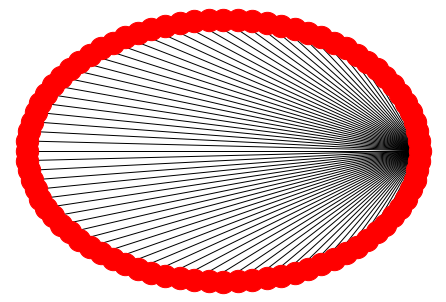

In [11]:
draw_graph(make_graph(411664440))